<a href="https://colab.research.google.com/github/The-Godfatherr/LAB-AIML/blob/main/LAB_4_Regression_E23cseu1335_Abhinav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 0: Ensure all required libraries are installed
!pip install numpy pandas scikit-learn matplotlib seaborn --quiet


In [3]:
# Step 1: Load the California Housing Dataset
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
print(housing.DESCR)  # Overview of dataset features and target


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [14]:
import pandas as pd

# Convert to DataFrame
df = housing.data
df['MedHouseVal'] = housing.target  # Add target column
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


from matplotlib import pyplot as plt
_df_0['MedInc'].plot(kind='hist', bins=20, title='MedInc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['HouseAge'].plot(kind='hist', bins=20, title='HouseAge')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['AveRooms'].plot(kind='hist', bins=20, title='AveRooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['AveBedrms'].plot(kind='hist', bins=20, title='AveBedrms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='MedInc', y='HouseAge', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='HouseAge', y='AveRooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='AveRooms', y='AveBedrms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='AveBedrms', y='Population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['MedInc'].plot(kind='line', figsize=(8, 4), title='MedInc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['HouseAge'].plot(kind='line', figsize=(8, 4), title='HouseAge')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['AveRooms'].plot(kind='line', figsize=(8, 4), title='AveRooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['AveBedrms'].plot(kind='line', figsize=(8, 4), title='AveBedrms')
plt.gca().spines[['top', 'right']].set_visible(False)

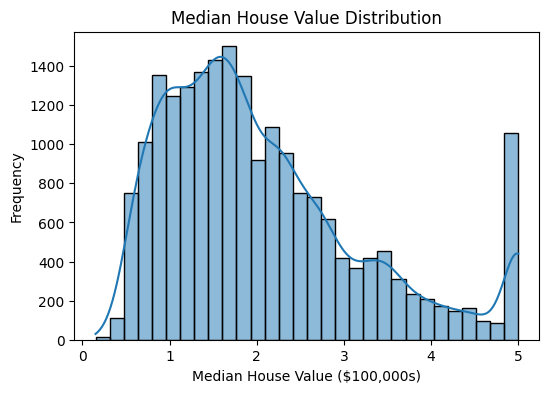

In [15]:
# Step 3: Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of the target variable's distribution
plt.figure(figsize=(6,4))
sns.histplot(df['MedHouseVal'], kde=True, bins=30)
plt.title("Median House Value Distribution")
plt.xlabel("Median House Value ($100,000s)")
plt.ylabel("Frequency")
plt.show()





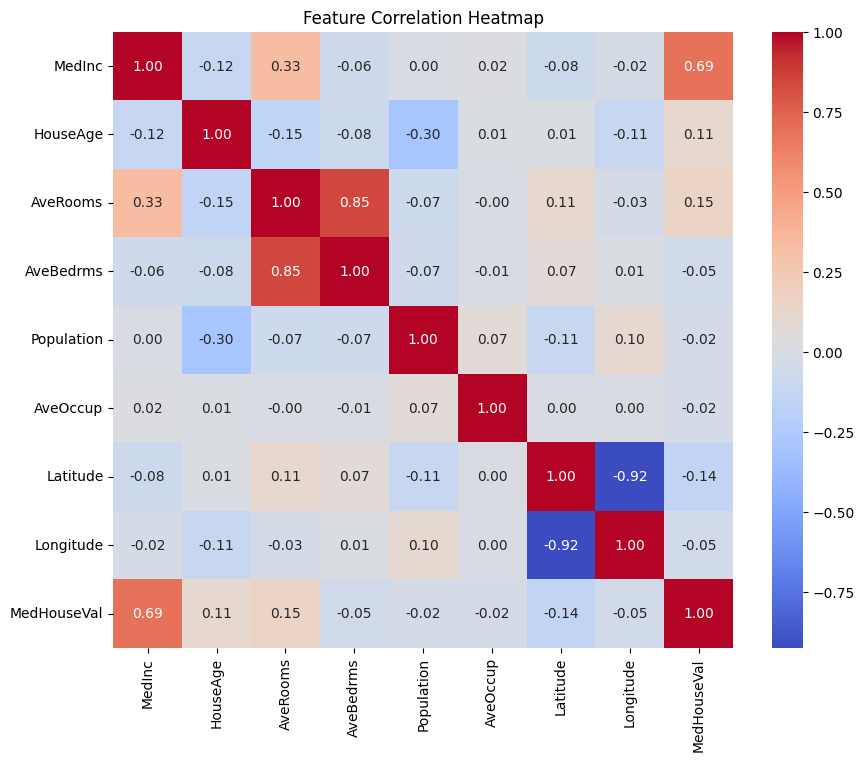

In [7]:

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [8]:
features = [
    'MedInc',     # Median Income
    'HouseAge',   # Median house age
    'AveRooms',   # Average rooms per household
    'AveBedrms',  # Average bedrooms per household
    'Population',
    'AveOccup',   # Average occupancy
    'Latitude',
    'Longitude'
]
X = df[features]
y = df['MedHouseVal']


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test set
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")


R² Score: 0.5758
Mean Squared Error: 0.5559


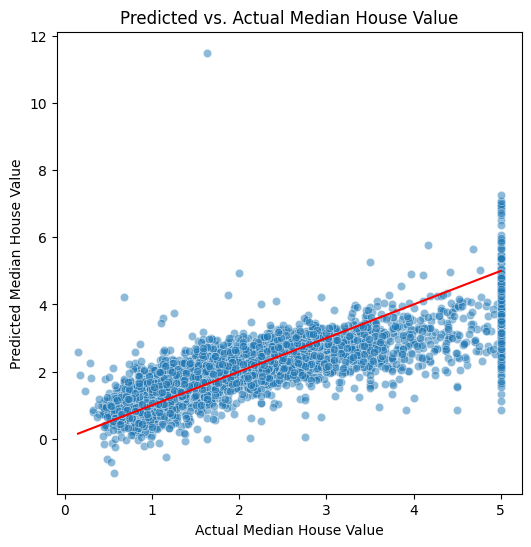

In [12]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Predicted vs. Actual Median House Value")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')
plt.show()


In [13]:
print(
    f"R² Score of {r2:.4f} explains how well the model fits the data. "
    "A higher value means better performance.\n"
    f"Mean Squared Error (MSE) = {mse:.4f}, so the average squared difference between actual and predicted values is {mse:.4f} (in $100,000s^2).\n"
    "Strengths: The model is fast and easily interpretable, particularly for linear relationships.\n"
    "Weaknesses: Sensitive to outliers and multicollinearity (high correlations between features, see the heatmap). Only captures linear trends and may perform poorly if data is non-linear or contains outliers.\n"
    "Possible improvements: Transform features, remove outliers, or use more advanced models (like tree-based regressors or regularization techniques)."
)


R² Score of 0.5758 explains how well the model fits the data. A higher value means better performance.
Mean Squared Error (MSE) = 0.5559, so the average squared difference between actual and predicted values is 0.5559 (in $100,000s^2).
Strengths: The model is fast and easily interpretable, particularly for linear relationships.
Weaknesses: Sensitive to outliers and multicollinearity (high correlations between features, see the heatmap). Only captures linear trends and may perform poorly if data is non-linear or contains outliers.
Possible improvements: Transform features, remove outliers, or use more advanced models (like tree-based regressors or regularization techniques).
